# Лабораторна робота 1

## Тема: Дослідження та візуалізація даних за допомогою Python
## Мета: отримати базові навики використання Python для дослідження та візуалізації даних.
### Варіант 3. Дослідження втрат бронетранспортерів (БТР).

### 1. Створіть функцію, яка приймає назву файлу та назву стовпця якпараметр та повертає масив numpy зі значеннями стовпця.

In [1]:
import csv
import numpy as np

def extract_column(filename, column_name):
    with open(filename, 'r') as file:
        csvreader = csv.reader(file)
        headers = next(csvreader)
        
        try:
            column_index = headers.index(column_name)
        except ValueError:
            raise ValueError(f"Column '{column_name}' not found in the file.")

        df = np.array(list(csvreader))
        
        return df[:, column_index]

### 2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier).

In [2]:
apc_losses = extract_column('russia_losses_equipment.csv', 'APC').astype(float)

print(apc_losses)

[17222. 17170. 17132. 17093. 17080. 17077. 17071. 17063. 17043. 17003.
 16955. 16938. 16925. 16906. 16897. 16878. 16878. 16869. 16848. 16821.
 16786. 16760. 16736. 16722. 16699. 16681. 16667. 16648. 16631. 16620.
 16599. 16567. 16542. 16521. 16495. 16480. 16473. 16461. 16426. 16402.
 16385. 16368. 16363. 16350. 16341. 16332. 16323. 16294. 16286. 16255.
 16238. 16211. 16203. 16161. 16141. 16103. 16095. 16074. 16050. 16039.
 16013. 16000. 15980. 15963. 15917. 15902. 15883. 15871. 15862. 15826.
 15811. 15779. 15755. 15732. 15715. 15704. 15685. 15645. 15629. 15611.
 15600. 15583. 15566. 15550. 15524. 15505. 15480. 15459. 15450. 15431.
 15413. 15398. 15383. 15372. 15337. 15319. 15307. 15287. 15269. 15263.
 15234. 15208. 15187. 15176. 15144. 15131. 15105. 15096. 15076. 15036.
 15020. 15002. 14980. 14947. 14935. 14913. 14891. 14858. 14818. 14803.
 14786. 14775. 14748. 14721. 14699. 14665. 14630. 14595. 14552. 14538.
 14508. 14460. 14417. 14375. 14353. 14313. 14281. 14246. 14227. 14213.
 14179

### 3. Знайдіть добові втрати БТР.

In [3]:
def daily_losses(apc_losses):
    arr = apc_losses[::-1]
    losses = np.diff(arr)
    losses = np.insert(losses, 0, arr[0])
    return losses.astype(float)

daily_losses_df = daily_losses(apc_losses)
print(daily_losses_df)

[516. 190.   0. 110.  30.  16.  38.  39.   6.  40.  14.  37.  34.  35.
  60.  40.  21.  23.  30.  96.  60.  13.  22.  17.  48.  21.  22.  19.
  28.  15.  24.  30.  16.  13.  12.  16.  25.  54.  14.  14.   3.  30.
   0.   4.  16.  12.  23.  18.   4.   8.   6.  20.  39.  22.  24.  31.
  44.  43.  33.  20.  50.  34.  47.  29.  27.  26.  48.  48.  43.  41.
  35.  27.  28.  23.  44.  48.  17.  27.  34.  24.  16.  35.  34.  20.
  27.  26.  25.  25.  28.  19.  22.  11.  12.  12.  12.  20.  41.  11.
  12.  13.  13.   8.  16.  13.   9.  12.  16.  18.   8.  11.  25.  17.
  18.  10.   4.  11.  18.   8.  18.   5.   8.  14.  28.  17.  16.   6.
  10.   1.   7.   0.  28.  17.   8.  14.   4.   8.   5.   1.   3.   0.
  34.   8.   5.   7.   6.  13.   7.   8.   9.  13.   8.   9.  12.   8.
   8.   8.   9.   7.   3.   8.   4.   6.  19.   4.  15.   6.  10.  14.
   8.   7.  11.  15.  11.  10.  17.  16.  17.  12.   6.   8.   5.   2.
   6.   3.   3.  12.  25.  18.  33.  21.  37.  27.  29.  25.  36.  37.
  18. 

### 4. Знайдіть 5 найбільших добових втрат БТР

In [4]:
def largest_daily_losses(daily_losses):
    return sorted(daily_losses_df)[-5:]

print(largest_daily_losses(daily_losses_df))

[96.0, 110.0, 120.0, 190.0, 516.0]


### 5. Визначте, скільки БТР було знищено влітку 2023 року.

In [5]:
def summer_losses(daily_losses):
    #return np.sum(daily_losses[461:552]) альтернативне рішення
    reverse_apc_losses = apc_losses[::-1]
    return reverse_apc_losses[552] - reverse_apc_losses[461]

print(summer_losses(daily_losses_df))

1126.0


### 6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.

In [6]:
def average_losses_for_period(daily_losses):
    return np.mean(daily_losses[99:499])
print(average_losses_for_period(daily_losses_df))

11.4675


### 7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

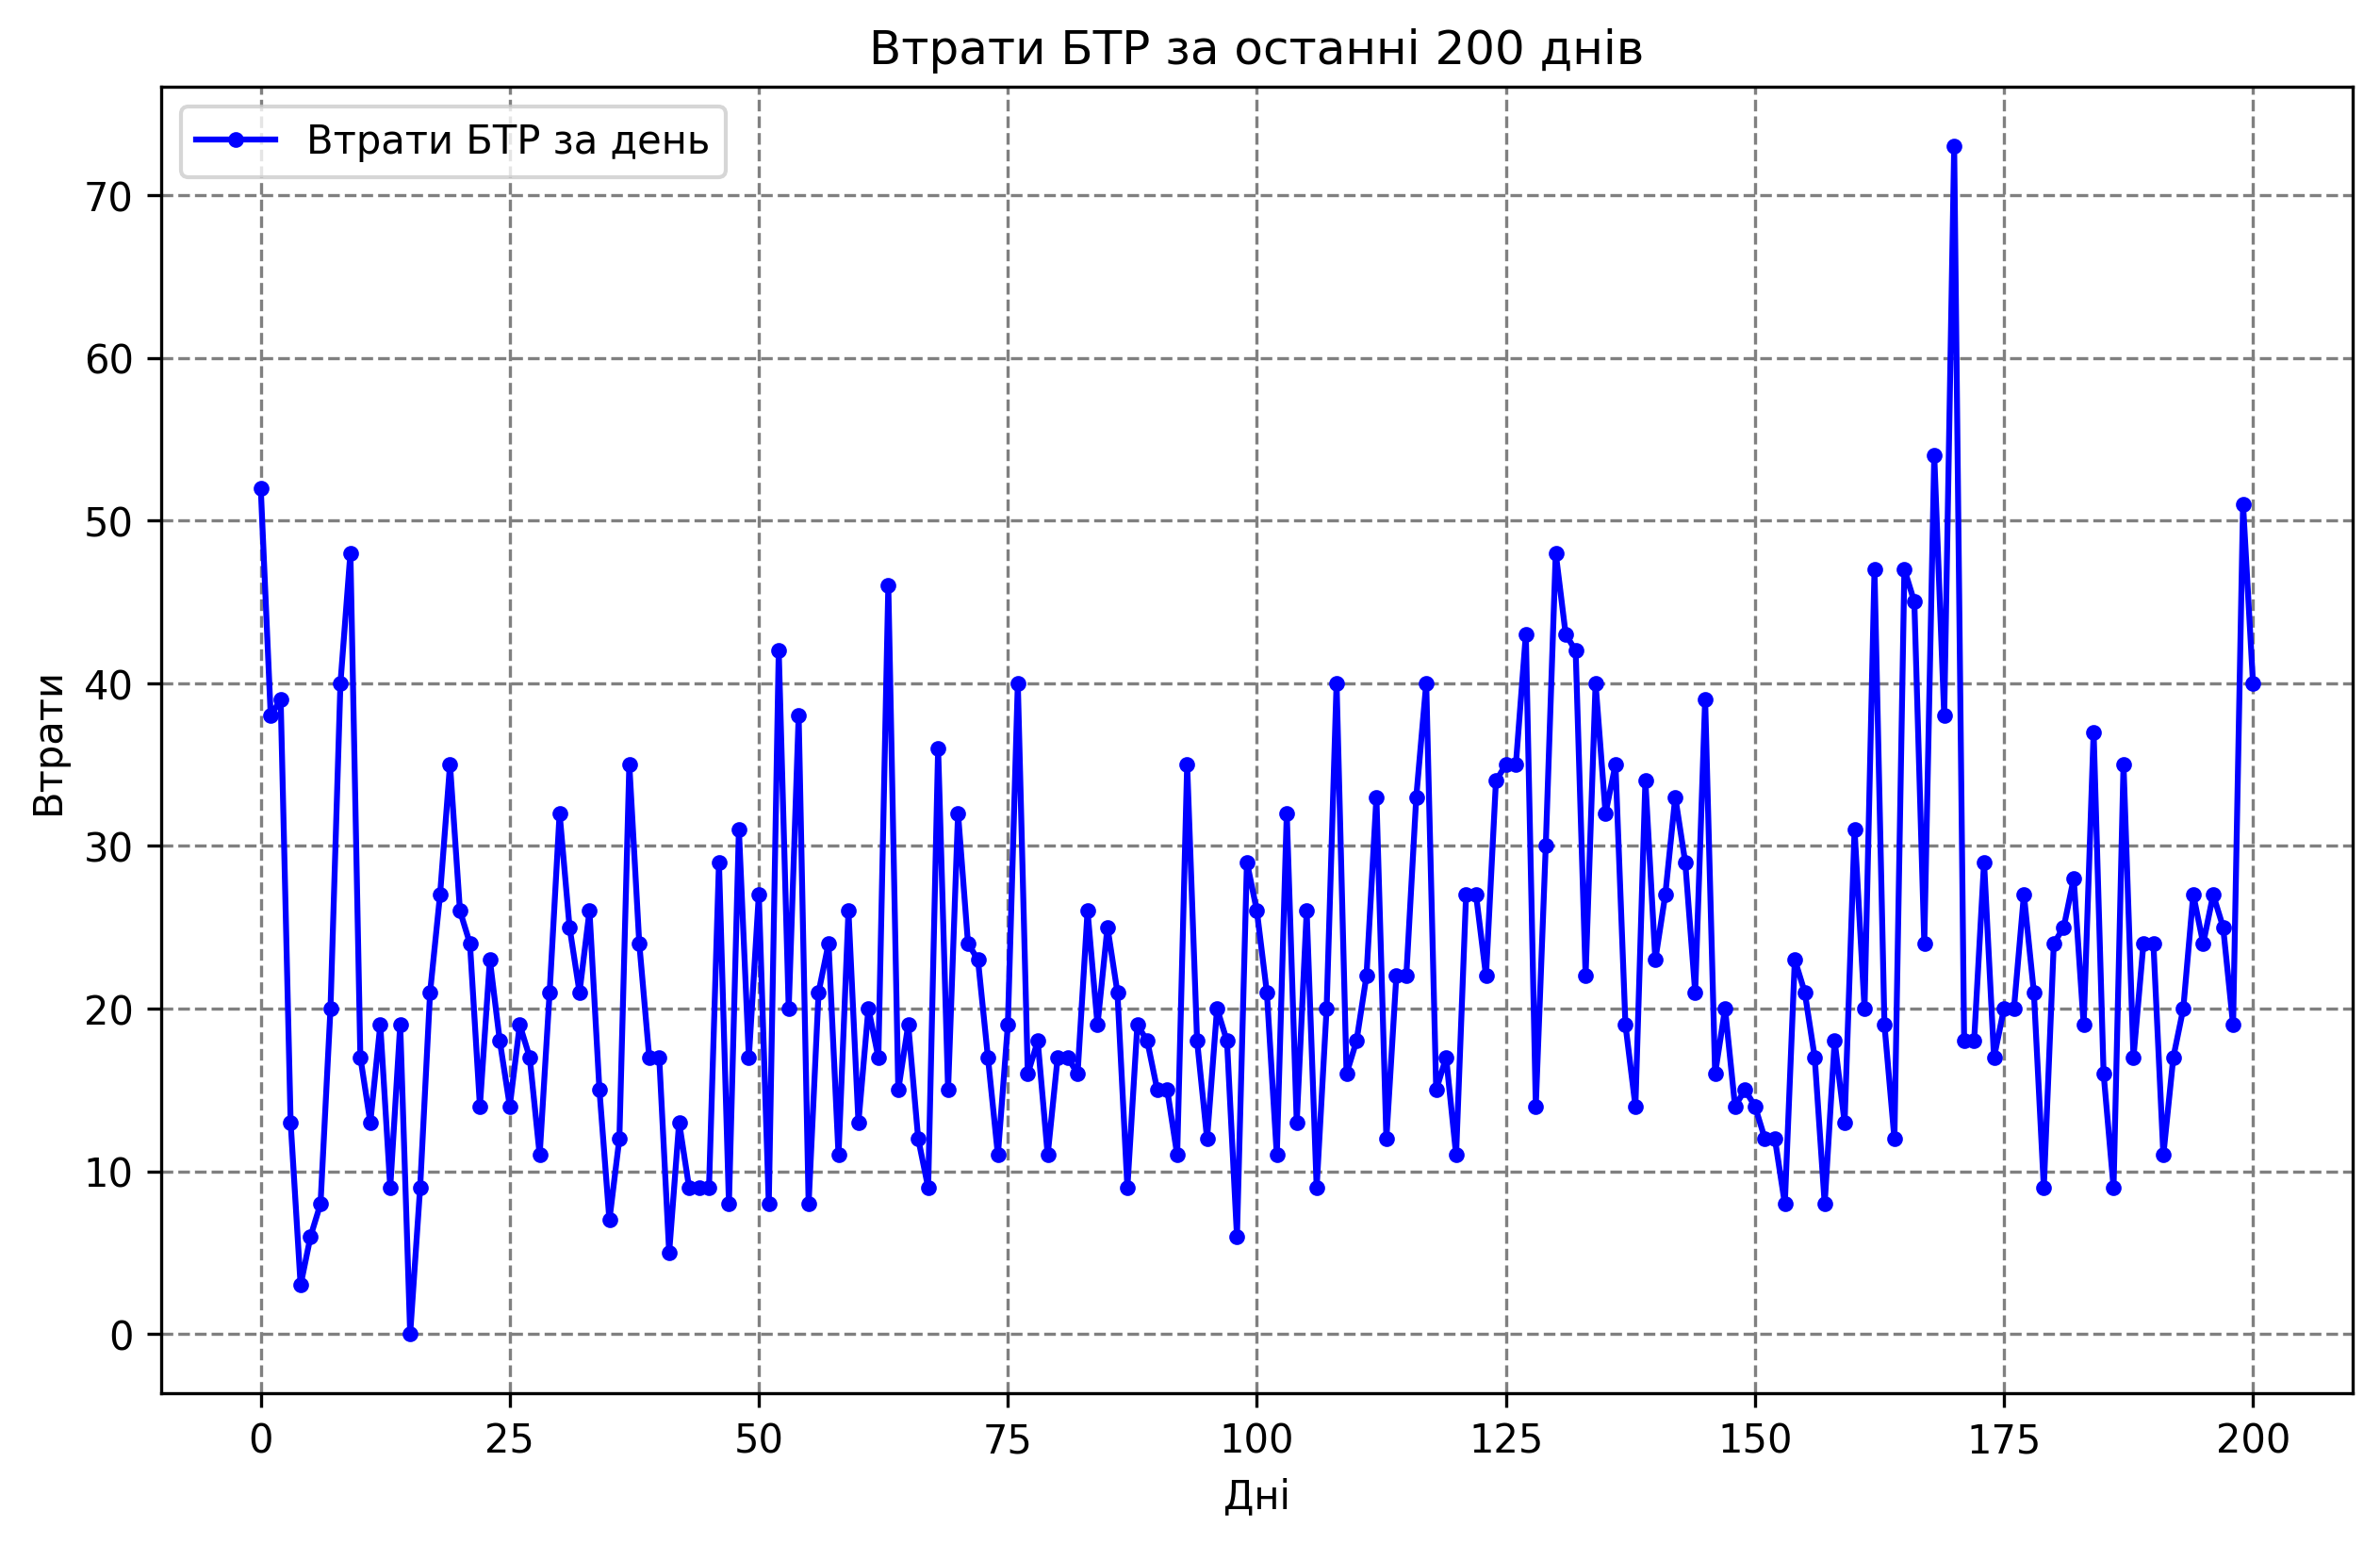

In [7]:
import matplotlib.pyplot as plt


def create_plot(daily_losses):
    reversed_losses = daily_losses[::-1]
    last_200_losses = reversed_losses[:201]

    plt.figure(figsize=(10, 6), dpi=300)
    plt.plot(last_200_losses, marker='.', linestyle='-', color='blue', label='Втрати БТР за день', linewidth=1.5) 
    plt.title('Втрати БТР за останні 200 днів')
    plt.xlabel('Дні')
    plt.ylabel('Втрати')
    plt.legend()
    plt.grid(True, color='grey', linestyle='--')
    plt.savefig('btr_losses_last_200_days.png', dpi=300)
    plt.show()
    
    
create_plot(daily_losses_df)